In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')
######################

# user_name='mohabu'
user_name='Mhdella'

In [2]:
import os
import pandas as pd
import numpy as np
import pickle
from datetime import timedelta

import netCDF4 as nc
import sys
import json
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
tf.random.set_seed(42)
from numpy.random import seed
seed(0)

In [4]:
cruis_fg=0 ## all ferry speed over ground
# cruis_fg=1 ## curising speed over ground

In [5]:
# weath_fg=1 ##keep the weather variables from external sources and their lag as present values
weath_fg=2  ##remove the weather variables from external sources and keep the onboard data only

In [6]:
wn_sp_sw='all'
# wn_sp_sw='ais'
# wn_sp_sw='cds'
# wn_sp_sw='sg'

In [7]:
lats_lons_sw=1 ##include latitude and longitude
### lats_lons_sw=0  ##not including lat and lon

In [8]:
# max_norm=0
max_norm=1
# max_norm=2

# shff_fg=0
shff_fg=1

lyr_no=10
# lyr_no=20

neo=100
# neo=150
# neo=200

# epcs=50
epcs=100
# epcs=300

In [9]:
compar_sw=23; outs1='2'; outs2='3'  ## comparison between outputs of case pw_mod_sw=2 and pw_mod_sw=3
# compar_sw=34; outs1='3'; outs2='4' ## comparison between outputs of case pw_mod_sw=3 and pw_mod_sw=4

In [10]:
cross_valid=0; ## no cross validation
# cross_valid=1; ## Run cross validation

In [11]:
# kk_id=0
# df_fuel_result=pd.DataFrame([]); df_fuel_stats=pd.DataFrame([]);
# df_stats=pd.DataFrame([])

# dfst_iter=[];dfst_inps=[]; dfst_Lyrs=[]; dfst_Neo=[]; dfst_epcs=[]; 
# dfst_inps_list=[]; dfst_outs_list=[];
# dfst_MSE=[]; dfst_RMSE=[]; dfst_R2=[]; dfst_MAE=[]
# dfst_phy_mod_sw

#####################################################################

# # for kk in range (100):
# for kk in range (9):
#     import tensorflow as tf
#     tf.random.set_seed(42)
#     from numpy.random import seed
#     seed(0)
    
#     pw_mod_sw=kk

# Year2020_fg=1 ###Use 2020 data only *to check the accuracy with Phy-Mod which used weather Copernicus 2020 data
Year2020_fg=0  ##Use all data available,  2019, 2020, 2021
##########

Exclud_port_fg=1  ## Excluding ports data
# Exclud_port_fg=0  
##########
windais_fg=1  ##Use wind data in the phy model from wind AIS
# windais_fg=0  ##Use wind data in the phy model from wind Coperniucs
################

Phi_course_fg=0 #Using course deviations *Vessel's course direction with resepect to True North
# Phi_course_fg=1 #using Phi as vessel's direction with respect to vessel's heading
#################
add_diff_fg=0  ##Not adding diff of sog&cog
# add_diff_fg=1  ## adding diff of sog&cog, forward diff = past-present
# add_diff_fg=2  ## adding diff of sog&cog, backword diff = present-past

###########
diff_fg=0  #### not using the input differnces
# diff_fg=1  #### using the input differnces, forward diff = past-present
# diff_fg=2  #### using the input differnces, backword diff = present-past

##########
# sog_kn=1  #covnert sog to knot/hr
sog_kn=0  #Keep sog to m/s
########
# max_norm=1  #normalize
# max_norm=2 #standardization, mean=0, std=1
# max_norm=0  #not normalize
################
# diff_drop=1 # drop wind_couse_diff from inputs
diff_drop=0 # Not to drop wind_couse_diff from inputs

################
top_fl_smps=1 #Select the data samples based on best fuel consumption
###top_fl_smps=0

###############
df_dt_fg=1   ####using data 3 that including date as index, this is more faster
# df_dt_fg=0

# df_merg='April' # using April2020 data
# df_merg='April_Oct' # using April and October 2020 data
df_merg='All2020' # using April and October 2020 data

##########
##########
###def training(x_train, y_train, x_valid, y_valid, path, neo,  epcs, shff_fg):

# lyr_no=1  #number of hidden layers 
# lyr_no=2 
# lyr_no=3
# lyr_no=4
# lyr_no=5
# lyr_no=10

#########
outs_no=1  #number of outputs 
# outs_no=2

#########

# shff_fg=0  #Without shuffle
# shff_fg=1  #With shuffle

#########
# neo=5  #number of neurons in every layer of ANN
# neo=10  #number of neurons in every layer of ANN
# neo=25
# neo=50
# neo=100

#########
# epcs=10 #number of epochs
# epcs=20  #number of epochs
# epcs=50  #number of epochs
# epcs=100  #number of epochs
# epcs=300  #number of epochs
# epcs=1000   

##############

latlon_prs_fg=0;  ## Use the past values for location data (lat, Lon)
#### latlon_prs_fg=1; ## Use the present values for location data (lat, Lon)

#############

past_fg=0; ##past_inputs = inputs   ### wind coruse directions are present measured values
# past_fg=1; ##past_inputs = inputs + ['directionTrue'] + ['courseOverGroundTrue']  ##all past values

##############

loc_fg=0  ##All data
# loc_fg=1  ##dfloc=df_sel[(df_sel['longitude']>=11.6585) & (df_sel['longitude']<=11.675) ]
# loc_fg=2  ##dfloc=df_sel[(df_sel['latitude']>=57.69) & (df_sel['latitude']<=57.71) ]

#################

# cruis_fg=0 ## all ferry speed over ground
# #     cruis_fg=1 ## curising speed over ground
###############

splt_fg=0   #test_size=20%
# splt_fg=1   #test_size=30%
# splt_fg=2   #test_size=40%
###########

# sz_fg=0 #size=1800
# sz_fg=1 #size=10000
# sz_fg=2 #size=100000
sz_fg=3 #size=len(df)

#####################
#####################

# tempo_res='H'  ; dw=0.03
# tempo_res='30min'  ; dw=0.03
# tempo_res='10min'  ; dw=0.015
# tempo_res='5min'  ; dw=0.005
# tempo_res='2min'  ; dw=0.005
tempo_res='1min'  ; dw=0.005
# tempo_res='30S'  ; dw=0.005
# tempo_res='10S'  ; dw=0.005
# tempo_res='1S' ; dw=0.005

###########


# In[3]:


import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.externals import joblib
import joblib
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import backend as k
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score, mean_squared_error
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


# In[4]:


import os
import pandas as pd
import numpy as np
import pickle
from datetime import timedelta

from bokeh.plotting import figure
from bokeh.tile_providers import get_provider, Vendors, WIKIMEDIA, CARTODBPOSITRON, STAMEN_TERRAIN, STAMEN_TONER, ESRI_IMAGERY, OSM
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure, ColumnDataSource
from bokeh.palettes import PRGn, RdYlGn
from bokeh.transform import linear_cmap,factor_cmap
from bokeh.layouts import row, column
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
import matplotlib.pyplot as plt
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")


# In[5]:


# cwd = os.getcwd() 
# # directory = os.path.join("/content/gdrive/MyDrive/Ceta_multi_days")
# directory = os.path.join('C:/+HP Folders/+Folder 2022/ecokit_data_2020_05_22/Processed_data')

# os.chdir(directory)

# # df=pd.read_csv('/content/gdrive/MyDrive/data1.csv')

# # df=pd.read_csv('/content/gdrive/MyDrive/data_v2.csv')

# # df=pd.read_csv('C:/+HP Folders/+Folder 2022/data_v2.csv')

# # df=pd.read_csv('C:/+HP Folders/+Folder 2022/ecokit_data_2020_05_22/Processed_data')

# # df=pd.read_csv('C:/+HP Folders/+Folder 2022/ecokit_data_2020_05_22/Processed_data/Data_File01_04_2020_04_59_49.xlsx')
# os.chdir(cwd) 


# In[6]:


# # df=pd.read_csv('C:/+HP Folders/+Folder 2022/data_v2.csv')
# ####################################################
# df= pd.read_pickle('C:/Users/Mhdella/iHelm/ECO KIT/Data_analysi_final/Processed_Data.pkl')
# ####################################################


# In[7]:


# !pip3 install pickle5
# import pickle5 as pickle


# In[8]:


# # infile = open('/content/gdrive/MyDrive/data_v3_1min.pkl','rb')

# # C:\Users\Mhdella\OneDrive - Högskolan i Halmstad\ECOKIT_MATERIAL
# # df = pickle.load(infile)

# if tempo_res=='1min':
#     df=pd.read_pickle('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad\ECOKIT_MATERIAL/data_v3_1min.pkl')



# In[ ]:


if user_name=='Mhdella':
    df=pd.read_pickle('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad\ECOKIT_MATERIAL/data_v3_1min.pkl')

else:
    cwd = os.getcwd() 
    # directory = os.path.join('C:/+HP Folders/+Folder 2022/ecokit_data_2020_05_22/Processed_data')
    directory = os.path.join('C:/Users/mohabu/data_v3/')


    os.chdir(directory)
    #####################
    ### df=pd.read_csv('C:/+HP Folders/+Folder 2022/data_v2.csv')

    # df= pd.read_pickle('C:/Users/Mhdella/iHelm/ECO KIT/Data_analysi_final/Processed_Data.pkl')
    # df=pd.read_pickle('C:/Users/mohabu/data_v3/data_v3_1min.pkl')

    if (df_dt_fg==0) & (tempo_res!='1min'):
        df=pd.read_pickle('C:/Users/mohabu/data_v3/data_v3.pkl')

    if (df_dt_fg==1) & (tempo_res!='1min'):
        df=pd.read_pickle('C:/Users/mohabu/data_v3/data_v3_incl_cruising.pkl')

    if tempo_res=='1min':
        df=pd.read_pickle('C:/Users/mohabu/data_v3/data_v3_1min.pkl')

#     if tempo_res=='1min':
#         df=pd.read_pickle('C:/Users/mohabu/data_v3/data_v3_1min.pkl')


    if (df_dt_fg==1) & (cruis_fg==1): 
        df=pd.read_pickle('C:/Users/mohabu/data_v3/data_v3_incl_cruising.pkl'); dt_fg='dt3_crus'


    os.chdir(cwd) 


# In[ ]:


df.columns


# In[ ]:
dforig=df

df.shape


(735619, 35)

In [12]:
print(df.shape)
df.columns

(735619, 35)


Index(['engineActualPercentTorque', 'engineSpeed', 'engineFuelRate',
       'accelPedalPos', 'engineTripFuel', 'engineTotalFuelUsed', 'latitude',
       'longitude', 'satellites', 'rateOfTurn', 'headingMagnetic',
       'courseOverGroundTrue', 'speedOverGround', 'magneticVariation', 'pitch',
       'roll', 'temperature', 'pressure', 'windSpeedOverGround',
       'windDirectionTrue', 'deltaTimestamp', 'fuelPerStep',
       'fuelPerStepEngineTotal', 'deltaDistance', 'acceleration',
       'courseHeadingDiff', 'engineOn', 'distanceFromDock', 'legId',
       'distanceToNextDock', 'distanceToPreviousDock', 'segmentId',
       'accumDistLeg', 'accumFuelLeg', 'accumTimeLeg'],
      dtype='object')

In [13]:
if cruis_fg==1:
    df=df[df.segmentState=='cruising']
if cruis_fg==0:
    df=df
    
df.shape

(735619, 35)

In [14]:
# st=stop

In [15]:
if Exclud_port_fg==0:
    df=df
if Exclud_port_fg==1:
    df=df[~(df.speedOverGround<0.5) & ~(df.deltaDistance<0.1)]
df.shape



# ##df['dt']=pd.to_datetime((df['timestamp']), format='%Y-%m-%d %H:%M:%S')
# df['dt']=pd.to_datetime((df['timestamp']), format='%y/%m/%d-%H:%M:%S')
# df['date'] = df['dt']
# df = df.set_index(df['date'])
# # df.drop('Unnamed: 0', axis=1, inplace=True)
df=df.resample(tempo_res).mean()

# df = df.dropna()
df = df[df['engineFuelRate'].notna()]

# df=df.reset_index()
# df.drop(['date', 'Unnamed: 0'], axis=1, inplace=True)
df.shape

(128549, 35)

In [16]:

# df.drop('index', axis=1, inplace=True)
# df.timestamp


# In[ ]:


if top_fl_smps==1:
#     df=df[df['engineFuelRate'] < df['engineFuelRate'].mean()]
    df=df[df['engineFuelRate'] >0]

if top_fl_smps==0:
    df=df


# In[ ]:


# mask = (df['timestamp'] >= '2020-01-01') & (df['timestamp'] <= '2020-12-31')
# df=df.loc[mask]

# df.timestamp


# #### Resample the data from 3 Hz to 1sec, 10sec, 1min.

# In[ ]:


df.shape


# In[ ]:


# df.isna().sum()|


# ### Loading Weather data from Copernicus

# In[ ]:


def wind_uv_to_dir(U,V):
    """
    Calculates the wind direction from the u and v component of wind.
    Takes into account the wind direction coordinates is different than the 
    trig unit circle coordinate. If the wind directin is 360 then returns zero
    (by %360)
    Inputs:
      U = west/east direction (wind from the west is positive, from the east is negative)
      V = south/noth direction (wind from the south is positive, from the north is negative)
    """
    WD= (270-np.rad2deg(np.arctan2(V,U)))%360

    return WD

def wind_uv_to_spd(V,U):
    """
    Calculates the wind speed from the u and v wind components
    Inputs:
      U = west/east direction (wind from the west is positive, from the east is negative)
      V = south/noth direction (wind from the south is positive, from the north is negative)
    """
    WS = np.sqrt(np.square(U)+np.square(V))
    return WS


# #### Copernicus Data

# In[ ]:


import xarray as xr

# ds = xr.open_dataset('C:/Users/mohabu/Weather_Cetasol_data/Copernicus_2020.nc')

ds2019 = xr.open_dataset('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/ECOKIT_MATERIAL/Copernicus_2019.nc')



U=ds2019['u10']; V=ds2019['v10'];
ds2019['wind_speed']=wind_uv_to_spd(U,V)
ds2019['wind_direction']=wind_uv_to_dir(U,V)
ds2019


# In[ ]:


ds=ds2019

lati = 57.70; loni = 11.6  # Groto
point = [loni,  lati]


lon = point[0]
lat = point[1]

loni=lon; lati=lat


# date_min='2021-01-01T00:00:00.000000000'; date_max='2021-04-30T23:00:00.000000000'

date_min='2019-11-01T00:00:00.000000000'; date_max='2019-12-31T23:00:00.000000000'

# date_min='2020-04-01T00:00:00.000000000'; date_max='2020-04-24T23:00:00.000000000'

# date_min='2020-01-01T00:00:00.000000000'; date_max='2020-12-31T23:00:00.000000000'



ds_ts=ds.sel(longitude=loni, latitude=lati,method='nearest').sel(time=slice(date_min,date_max))
copernicus_winds=ds_ts



df_copernicus = pd.DataFrame(columns= ['time','windSpeed','windDirection','waveheight', 
                                        'wavedirect','waveperiod','wavedrag_coeff' ])

df_copernicus.time = ds_ts.time.values
df_copernicus.windSpeed=ds_ts.wind_speed.values
df_copernicus.windDirection=ds_ts.wind_direction.values
df_copernicus.waveheight=ds_ts.shww.values
df_copernicus.wavedrag_coeff=ds_ts.cdww.values
df_copernicus.wavedirect=ds_ts.mwd.values
df_copernicus.waveperiod=ds_ts.mwp.values

df_copernicus2019=df_copernicus
df_copernicus2019


# In[ ]:


import xarray as xr

ds2020 = xr.open_dataset('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/ECOKIT_MATERIAL/Copernicus_2020.nc')



U=ds2020['u10']; V=ds2020['v10'];
ds2020['wind_speed']=wind_uv_to_spd(U,V)
ds2020['wind_direction']=wind_uv_to_dir(U,V)
ds2020


# In[ ]:


ds=ds2020

lati = 57.70; loni = 11.6  # Groto
point = [loni,  lati]


lon = point[0]
lat = point[1]

loni=lon; lati=lat


# date_min='2021-01-01T00:00:00.000000000'; date_max='2021-04-30T23:00:00.000000000'

# date_min='2020-03-26T00:00:00.000000000'; date_max='2020-04-24T23:00:00.000000000'

# date_min='2020-04-01T00:00:00.000000000'; date_max='2020-04-24T23:00:00.000000000'

date_min='2020-01-01T00:00:00.000000000'; date_max='2020-12-31T23:00:00.000000000'



ds_ts=ds.sel(longitude=loni, latitude=lati,method='nearest').sel(time=slice(date_min,date_max))
copernicus_winds=ds_ts



df_copernicus = pd.DataFrame(columns= ['time','windSpeed','windDirection','waveheight', 
                                        'wavedirect','waveperiod','wavedrag_coeff' ])

df_copernicus.time = ds_ts.time.values
df_copernicus.windSpeed=ds_ts.wind_speed.values
df_copernicus.windDirection=ds_ts.wind_direction.values
df_copernicus.waveheight=ds_ts.shww.values
df_copernicus.wavedrag_coeff=ds_ts.cdww.values
df_copernicus.wavedirect=ds_ts.mwd.values
df_copernicus.waveperiod=ds_ts.mwp.values

df_copernicus2020=df_copernicus
df_copernicus2020


# In[ ]:


import xarray as xr

ds2021 = xr.open_dataset('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/ECOKIT_MATERIAL/Copernicus_2021_Dec_April.nc')



U=ds2021['u10']; V=ds2021['v10'];
ds2021['wind_speed']=wind_uv_to_spd(U,V)
ds2021['wind_direction']=wind_uv_to_dir(U,V)
ds2021


# In[ ]:





# In[ ]:


ds=ds2021

lati = 57.70; loni = 11.6  # Groto
point = [loni,  lati]


lon = point[0]
lat = point[1]

loni=lon; lati=lat


date_min='2021-01-01T00:00:00.000000000'; date_max='2021-04-30T23:00:00.000000000'

# date_min='2020-03-26T00:00:00.000000000'; date_max='2020-04-24T23:00:00.000000000'

# date_min='2020-04-01T00:00:00.000000000'; date_max='2020-04-24T23:00:00.000000000'

# date_min='2020-01-01T00:00:00.000000000'; date_max='2020-12-31T23:00:00.000000000'



ds_ts=ds.sel(longitude=loni, latitude=lati,method='nearest').sel(time=slice(date_min,date_max))
copernicus_winds=ds_ts



df_copernicus = pd.DataFrame(columns= ['time','windSpeed','windDirection','waveheight', 
                                        'wavedirect','waveperiod','wavedrag_coeff' ])

df_copernicus.time = ds_ts.time.values
df_copernicus.windSpeed=ds_ts.wind_speed.values
df_copernicus.windDirection=ds_ts.wind_direction.values
df_copernicus.waveheight=ds_ts.shww.values
df_copernicus.wavedrag_coeff=ds_ts.cdww.values
df_copernicus.wavedirect=ds_ts.mwd.values
df_copernicus.waveperiod=ds_ts.mwp.values

df_copernicus2021=df_copernicus
df_copernicus2021


# In[ ]:


# # ds=xr.concat([ds2019, ds2020, ds2021], pd.Index([-90, -100], name="new_dim"))

# ds=xr.concat([ds2019, ds2020, ds2021], dim='time')
# ds

df_copernicus=pd.concat([df_copernicus2019, df_copernicus2020, df_copernicus2021], axis=0)
df_copernicus.shape


# In[ ]:


df_copernicus.head()
df_copernicus.tail()


# In[ ]:


#     fig = plt.figure(figsize=(14,5))

#     plt.subplot(1,2, 1)
#     plt.plot(df_copernicus.time,df_copernicus.windSpeed, label='Wind Speed')
#     plt.ylabel('ms-1', fontsize=15, labelpad=10)
#     plt.yticks(fontsize=12);
#     plt.xticks(fontsize=12, rotation = 75);
#     plt.title('Wind Speed ', fontsize=14) 
#     # plt.legend()
#     plt.grid()

#     plt.subplot(1,2, 2)
#     plt.plot(df_copernicus.time, df_copernicus.windDirection, label='Wind Direction')
#     plt.ylabel('Degree', fontsize=15, labelpad=10)
#     plt.yticks(fontsize=12);
#     plt.xticks(fontsize=12, rotation = 75);
#     plt.title('Wind Direction',fontsize=14)
#     # plt.legend()
#     plt.grid()

#     plt.tight_layout()
#     plt.show();


# In[ ]:


# df_copernicus
df_copernicus.shape


# In[ ]:


dfsel_cds=df_copernicus
dfsel_cds.index=dfsel_cds['time']

# dfsel_cds = dfsel_cds.set_index(dfsel_cds['time'])

dfsel_cds=dfsel_cds.resample(tempo_res).mean() 

dfsel_cds_filled=dfsel_cds.interpolate(method='linear', limit_direction='forward', axis=0)
dfsel_sg_filled2=dfsel_cds_filled.interpolate(method='linear', limit_direction='backward', axis=0)

dfsel_cds=dfsel_sg_filled2

# dfsel_cds=dfsel_cds.dropna()

df_copernicus=dfsel_cds

df_copernicus


# In[ ]:


time_match2=np.isin(df_copernicus.index, df.index)
time2=df_copernicus.index[time_match2]

#     fig = plt.figure(figsize=(18,14))


#     plt.subplot(2,1, 1)
#     plt.plot(time2, df.windSpeedOverGround.loc[time2], label='AIS')
#     plt.plot(time2, df_copernicus.windSpeed.loc[time_match2], label='Copernicus')
#     plt.ylabel('ms-1', fontsize=15, labelpad=10)
#     plt.yticks(fontsize=12);
#     plt.xticks(fontsize=12, rotation = 75);
#     plt.title('Wind Speed ', fontsize=14) 
#     plt.legend(fontsize=16)
#     plt.grid()


#     plt.tight_layout()
#     plt.show();


# In[ ]:


df_copernicus.columns


# ### Including weather data among the inputs

# In[ ]:


time_match3=np.isin(df_copernicus.index, df.index)
time3=df_copernicus.index[time_match3]

df['windSpeed']=df_copernicus['windSpeed'].loc[time3]
df['windDirection']=df_copernicus['windDirection'].loc[time3]
df['waveheight']=df_copernicus['waveheight'].loc[time3]
df['wavedirect']=df_copernicus['wavedirect'].loc[time3]
df['waveperiod']=df_copernicus['waveperiod'].loc[time3]
df['wavedrag_coeff']=df_copernicus['wavedrag_coeff'].loc[time3]


# In[ ]:


df.shape

(128548, 41)

In [17]:
df[['EngineFuelRate', 'directionTrue']]=df[['engineFuelRate','windDirectionTrue']]


# In[ ]:


# df[['headingMagnetic','courseOverGroundTrue', 'directionTrue']].head()


# In[ ]:


# df[['headingMagnetic','courseOverGroundTrue','angleApparent', 'directionTrue']]=df[['headingMagnetic','courseOverGroundTrue','angleApparent', 'directionTrue']]/np.pi*180

df[['headingMagnetic','courseOverGroundTrue', 'directionTrue']]=df[['headingMagnetic','courseOverGroundTrue', 'directionTrue']]/np.pi*180



if sog_kn==1:
    df['speedOverGround']=df['speedOverGround']*3600/1852  #convert sog from m/s to kt/h
if sog_kn==0:
    df['speedOverGround']= df['speedOverGround']

#### Fuel Cons = 0.2525 × Speed^2 – 1.6307 × Speed   ### fuel_Sp_formula



outputs=['EngineFuelRate']


############################
# inputs=['PwMod']

# inputs=['speedOverGround_poly3_2', 'waveheight_poly3', 'windspeed_poly1_5', 'meanwaveperiod',  
#         'heading_wave', 'Cos_HWaveP', 'Cos_HWindP', 'PwMod', 'wavedrag_coeff',
#         'speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
#         'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff'] 

# inputs=['speedOverGround_poly3_2', 'waveheight_poly3', 'windspeed_poly1_5', 'meanwaveperiod',  
#             'heading_wave', 'Cos_HWaveP', 'Cos_HWindP', 'PwMod', 'wavedrag_coeff',
#             'speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
#             'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff'] ##R2=0.757,Normal_Exclud@ly=5,Ne100ep1000, R2=0.597522,Notnormal@ly=5,Ne100

# inputs=['PwMod',
#             'speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
#             'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff'] ##R2=0.7685,Normal_Exclud@ly=5,Ne100ep1000



if tempo_res=='1min':

    dfw = pd.DataFrame({"Wsp":df['windSpeedOverGround'],
                       "Vb":df['speedOverGround'],
                       "Wdr":df['directionTrue']/180*np.pi,
                       "Bdr":df['courseOverGroundTrue']/180*np.pi})


    dfw['alpha']=dfw.Bdr-dfw.Wdr
    dfw['Adiff']=dfw['alpha']
    dfw['cal_appsp']=np.sqrt(dfw.Wsp**2+dfw.Vb**2+2*dfw.Wsp*dfw.Vb*np.cos(dfw.Adiff))
    dfw['cal_appdr']=np.arccos((dfw.Wsp*np.cos(dfw.Adiff)+dfw.Vb)/(dfw.cal_appsp))


    df['speedApparent']=dfw['cal_appsp']
    df['speedApparent'].max()


# In[ ]:


# df['cos_alpha']=np.cos(dfw.Adiff)
# df['2*cos_alpha']=2*np.cos(dfw.Adiff)

# df['2*W*cos_alpha']=2*df['windSpeedOverGround']*np.cos(dfw.Adiff)
# df['2*V*cos_alpha']=2*df['speedOverGround']*np.cos(dfw.Adiff)


# df['windSpeed_poly2']=df['windSpeedOverGround']*df['windSpeedOverGround']
# df['sog_poly2']=df['speedOverGround']*df['speedOverGround']

# df['speedApparent_poly2']=df['speedApparent']*df['speedApparent']

df['speedOverGround_poly2']=df['speedOverGround']*df['speedOverGround']
df['speedOverGround_poly3']=df['speedOverGround']*df['speedOverGround']*df['speedOverGround']

df['fuel_Sp_formula'] = 0.2525*df['speedOverGround_poly2'] - 1.6307 * df['speedOverGround']  ### fuel_Sp_formula


# ### Fuel Consumption Model
# 
# [Ref.] C3S_D422_Lot1_OSM.2.6_201809_SC2 – Operational Indicators Technical Note
# 
# 
# The fuel consumption model is developed to calculate the power needs and fuel consumption of a
# ship when it sails in the ocean. The model is being developed for several standard ship categories
# w.r.t. maritime operation and dimensions. Further details, background, and input data requirements
# are already defined in:
# C3S_D422Lot1.OSM.2.6(1)_201805_Operational_Indicators_Technical_Note_v1. In the document
# presented here we describe the progress in terms of wave added resistance calculation w.r.t. ship
# speed and heading.
# 2.1 Wave added resistance
# 
# ![image.png](attachment:image.png)

# In[ ]:


df.headingMagnetic.describe()
df.wavedirect.describe()
df.windDirection.describe()
df.directionTrue.describe()


# In[ ]:


# st=stop


# In[ ]:


df['speedOverGround_poly3_2']=df.speedOverGround**3.2
df['waveheight_poly3']=df.waveheight**3
df['windspeed_poly1_5']=df.windSpeedOverGround**1.5
df['meanwaveperiod']=df.waveperiod
df['heading_wave']=(df.headingMagnetic-df.wavedirect)*np.pi/180
if windais_fg==0:
    df['heading_wind']=(df.headingMagnetic-df.windDirection)*np.pi/180
if windais_fg==1:
    df['heading_wind']=(df.headingMagnetic-df.directionTrue)*np.pi/180

df['Cos_HWaveP']=np.cos(df['heading_wave'])+np.pi/df.meanwaveperiod
df['Cos_HWindP']=np.cos(2*df['heading_wind'])+np.pi/(2*df.meanwaveperiod)

In [18]:
df.shape

(128548, 55)

In [19]:
df_copernicus.shape

(787621, 6)

### StormGlass Data

In [20]:
# file = "C:/Users/mohabu/Weather_Cetasol_data/2019_20_21_stormglass_baltic_sea_point.json"

file = 'C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/ECOKIT_MATERIAL/2019_20_21_stormglass_baltic_sea_point.json'

print(file)

with open(file) as json_file:
    json_data = json.load(json_file);

python_dictionary = json.loads(json_data);
# #print(python_dictionary[0])

# for file_dict in python_dictionary:
# #     print(file_dict['meta']);

time = []
currentSpeed = []
currentDirection = []
windSpeed = []
windDirection = []
for file_dict in python_dictionary:
    for i in file_dict['hours']:
        try:
            #print(i)
            #print(i['time'])
            currentSpeed.append(i['currentSpeed']['sg']);
            currentDirection.append(i['currentDirection']['sg']);
            windSpeed.append(i['windSpeed']['sg']);
            windDirection.append(i['windDirection']['sg']);
            time.append(i['time']);
        except KeyError:
            continue   
            
df_stormglass=[]
df_stormglass = pd.DataFrame(columns= ['time','currentSpeed','currentDirection', 'windSpeed', 'windDirection'])
df_stormglass.time = time
df_stormglass.time = pd.to_datetime(df_stormglass.time)

df_stormglass.currentSpeed = currentSpeed
df_stormglass.currentDirection = currentDirection
df_stormglass.windSpeed = windSpeed
df_stormglass.windDirection = windDirection


# mask = (df_stormglass['time'] >= '2020-01-01') & (df_stormglass['time'] < '2021-01-01')
# mask = (df_stormglass['time'] >= '2020-04-01') & (df_stormglass['time'] < '2020-04-02')
mask = (df_stormglass['time'] >= '2019-11-01') & (df_stormglass['time'] < '2021-04-30')


df_stormglass=df_stormglass.loc[mask]

df_stormglass

C:/Users/Mhdella/OneDrive - Högskolan i Halmstad/ECOKIT_MATERIAL/2019_20_21_stormglass_baltic_sea_point.json


,time,currentSpeed,currentDirection,windSpeed,windDirection
0,2019-11-26 00:00:00+00:00,0.46,183.94,7.1,134.0
1,2019-11-26 01:00:00+00:00,0.41,196.87,7.0,145.0
2,2019-11-26 02:00:00+00:00,0.32,214.12,7.2,147.0
3,2019-11-26 03:00:00+00:00,0.24,240.98,7.1,144.0
4,2019-11-26 04:00:00+00:00,0.16,269.46,6.8,146.0
...,...,...,...,...,...
12284,2021-04-18 20:00:00+00:00,0.32,183.13,6.1,41.0
12285,2021-04-18 21:00:00+00:00,0.33,185.14,5.7,61.0
12286,2021-04-18 22:00:00+00:00,0.33,187.15,5.7,69.0
12287,2021-04-18 23:00:00+00:00,0.33,189.16,5.2,69.0


In [21]:
df_stormglass.time=df_stormglass.time.apply(lambda d: d.replace(tzinfo=None))

In [22]:
dfsel_sg=df_stormglass
dfsel_sg.index=dfsel_sg['time']


dfsel_sg=dfsel_sg.resample(tempo_res).mean() 

dfsel_sg_filled=dfsel_sg.interpolate(method='linear', limit_direction='forward', axis=0)
dfsel_sg_filled2=dfsel_sg_filled.interpolate(method='linear', limit_direction='backward', axis=0)

dfsel_sg=dfsel_sg_filled2

#dfsel_sg=dfsel_sg.dropna()

df_stormglass=dfsel_sg


df_stormglass.shape

(734401, 4)

In [23]:
time_match3=np.isin(df_stormglass.index, df.index)
time3=df_stormglass.index[time_match3]

In [24]:
print(df.loc[time3].shape)
print(df_copernicus.loc[time3].shape)
print(df_stormglass.loc[time3].shape)

(127641, 55)
(127641, 6)
(127641, 4)


In [25]:
print(df.loc[time3].isna().sum().sum())
print(df_copernicus.loc[time3].isna().sum().sum())
print(df_stormglass.loc[time3].isna().sum().sum())

73
0
0


In [26]:
# print(df.loc[time3].isna().sum())

In [27]:
# st1=stop

In [28]:
df[['EngineFuelRate', 'directionTrue']]=df[['engineFuelRate','windDirectionTrue']]


if df['headingMagnetic'].max()<300:
    df['headingMagnetic']= df['headingMagnetic']/np.pi*180
    
if df['courseOverGroundTrue'].max()<300:
    df['courseOverGroundTrue']= df['courseOverGroundTrue']/np.pi*180
    
if df['directionTrue'].max()<300:
    df['directionTrue']= df['directionTrue']/np.pi*180
    
    
df['wind_course_diff']=df['directionTrue']-df['courseOverGroundTrue']
df['wind_head_diff']=df['directionTrue']-df['headingMagnetic']

df[['headingMagnetic','courseOverGroundTrue','directionTrue','wind_head_diff']].describe()

,headingMagnetic,courseOverGroundTrue,directionTrue,wind_head_diff
count,128548.000000,128548.000000,128548.000000,128548.000000
mean,194.705109,189.217934,195.546233,0.841124
std,85.350380,88.171109,86.623225,120.495479
min,0.829657,0.671456,4.787292,-344.814467
25%,140.340078,121.045037,137.141090,-59.908041
50%,179.221771,178.055516,204.952029,13.126195
75%,248.744141,251.106224,268.529226,87.181778
max,359.172875,359.205347,354.770511,336.845765


In [29]:
# dfw = pd.DataFrame({"Wsp":df['windSpeedOverGround'],
#                    "Vb":df['speedOverGround'],
#                    "Wdr":df['directionTrue']/180*np.pi,
#                    "Bdr":df['courseOverGroundTrue']/180*np.pi})


# dfw['alpha']=dfw.Bdr-dfw.Wdr
# dfw['Adiff']=dfw['alpha']
# dfw['cal_appsp']=np.sqrt(dfw.Wsp**2+dfw.Vb**2+2*dfw.Wsp*dfw.Vb*np.cos(dfw.Adiff))
# dfw['cal_appdr']=np.arccos((dfw.Wsp*np.cos(dfw.Adiff)+dfw.Vb)/(dfw.cal_appsp))


# df['speedApparent']=dfw['cal_appsp']
# df['speedApparent'].max()


In [30]:
df['speedApparent'].max()

30.914899974999386

In [31]:
dforig1=df
# df=dforig1

In [32]:
if lats_lons_sw==0:
    df=df[['EngineFuelRate','speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
                'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff', 'roll']].loc[time3]   
if lats_lons_sw==1:
    df=df[['EngineFuelRate','speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
                'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff', 'roll', 'latitude', 'longitude']].loc[time3]   

In [33]:
df['windSpeed_onboard']=df['windSpeedOverGround'].loc[time3]
df['windDirection_onboard']=df['directionTrue'].loc[time3]

df['currentSpeed_Stormglass']=df_stormglass['currentSpeed'].loc[time3]
df['currentDirection_Stormglass']=df_stormglass['currentDirection'].loc[time3]
df['windSpeed_Stormglass']=df_stormglass['windSpeed'].loc[time3]
df['windDirection_Stormglass']=df_stormglass['windDirection'].loc[time3]

df['windSpeed_Copernicus']=df_copernicus['windSpeed'].loc[time3]
df['windDirection_Copernicus']=df_copernicus['windDirection'].loc[time3]
df['waveHeight_Copernicus']=df_copernicus['waveheight'].loc[time3]
df['waveDirection_Copernicus']=df_copernicus['wavedirect'].loc[time3]

df.drop('windSpeedOverGround', axis=1, inplace=True)
df.drop('directionTrue', axis=1, inplace=True)

    
df.shape

(127641, 23)

In [34]:
# st=stop

In [35]:
if wn_sp_sw=='ais':
    df.windSpeed_onboard=df.windSpeed_Copernicus
    df.windDirection_onboard=df.windDirection_Copernicus
    
    df.wind_course_diff=df.wind_course_diff

    df.speedApparent=df.speedApparent
    print('SpApp=',df['speedApparent'].max())
    
    df=df.drop(['roll', 'latitude', 'longitude', 
       'currentSpeed_Stormglass', 'currentDirection_Stormglass',
       'windSpeed_Stormglass', 'windDirection_Stormglass',
       'windSpeed_Copernicus', 'windDirection_Copernicus',
       'waveHeight_Copernicus', 'waveDirection_Copernicus' ], axis=1)
    
    df.shape

In [36]:
if wn_sp_sw=='cds':
    df.windSpeed_onboard=df.windSpeed_Copernicus
    df.windDirection_onboard=df.windDirection_Copernicus
    
    df['wind_course_diff']=df['windDirection_onboard']-df['courseOverGroundTrue']
    
    dfw = pd.DataFrame({"Wsp":df['windSpeed_onboard'],
                   "Vb":df['speedOverGround'],
                   "Wdr":df['windDirection_onboard']/180*np.pi,
                   "Bdr":df['courseOverGroundTrue']/180*np.pi})


    dfw['alpha']=dfw.Bdr-dfw.Wdr
    dfw['Adiff']=dfw['alpha']
    dfw['cal_appsp']=np.sqrt(dfw.Wsp**2+dfw.Vb**2+2*dfw.Wsp*dfw.Vb*np.cos(dfw.Adiff))
    dfw['cal_appdr']=np.arccos((dfw.Wsp*np.cos(dfw.Adiff)+dfw.Vb)/(dfw.cal_appsp))
    df['speedApparent']=dfw['cal_appsp']
    print('SpApp=',df['speedApparent'].max())
    
    df=df.drop(['roll', 'latitude', 'longitude', 
       'currentSpeed_Stormglass', 'currentDirection_Stormglass',
       'windSpeed_Stormglass', 'windDirection_Stormglass',
       'windSpeed_Copernicus', 'windDirection_Copernicus',
       'waveHeight_Copernicus', 'waveDirection_Copernicus' ], axis=1)
    
    df.shape

In [37]:
if wn_sp_sw=='sg':
    df.windSpeed_onboard=df.windSpeed_Stormglass
    df.windDirection_onboard=df.windDirection_Stormglass
    
    df['wind_course_diff']=df['windDirection_onboard']-df['courseOverGroundTrue']
    
    dfw = pd.DataFrame({"Wsp":df['windSpeed_onboard'],
                   "Vb":df['speedOverGround'],
                   "Wdr":df['windDirection_onboard']/180*np.pi,
                   "Bdr":df['courseOverGroundTrue']/180*np.pi})


    dfw['alpha']=dfw.Bdr-dfw.Wdr
    dfw['Adiff']=dfw['alpha']
    dfw['cal_appsp']=np.sqrt(dfw.Wsp**2+dfw.Vb**2+2*dfw.Wsp*dfw.Vb*np.cos(dfw.Adiff))
    dfw['cal_appdr']=np.arccos((dfw.Wsp*np.cos(dfw.Adiff)+dfw.Vb)/(dfw.cal_appsp))
    df['speedApparent']=dfw['cal_appsp']
    print('SpApp=',df['speedApparent'].max())

    df=df.drop(['roll', 'latitude', 'longitude', 
           'currentSpeed_Stormglass', 'currentDirection_Stormglass',
           'windSpeed_Stormglass', 'windDirection_Stormglass',
           'windSpeed_Copernicus', 'windDirection_Copernicus',
           'waveHeight_Copernicus', 'waveDirection_Copernicus' ], axis=1)
    
    df.shape

In [38]:
df.shape

(127641, 23)

In [39]:
df.head()

,EngineFuelRate,speedOverGround,courseOverGroundTrue,distanceFromDock,accumDistLeg,accumTimeLeg,distanceToNextDock,speedApparent,pitch,wind_course_diff,...,windSpeed_onboard,windDirection_onboard,currentSpeed_Stormglass,currentDirection_Stormglass,windSpeed_Stormglass,windDirection_Stormglass,windSpeed_Copernicus,windDirection_Copernicus,waveHeight_Copernicus,waveDirection_Copernicus
time,,,,,,,,,,,,,,,,,,,,,
2019-11-29 16:12:00,30.187500,4.730000,59.395670,556.989933,437.081087,260488.800000,NaN,12.365288,0.017944,288.752585,...,10.005000,348.148255,0.354000,76.968000,11.640,329.000000,9.569658,333.804626,1.168305,337.945129
2019-11-29 16:13:00,9.350000,3.960000,132.192822,650.032742,1130.498995,260561.100000,NaN,5.600387,0.019100,202.500474,...,9.050000,334.693296,0.354333,82.808667,11.635,329.083333,9.563120,333.788422,1.167560,337.889618
2019-11-29 16:14:00,3.900000,3.650000,140.642518,642.481057,1174.847991,260599.800000,NaN,5.735862,0.012200,197.849489,...,9.100000,338.492006,0.354667,88.649333,11.630,329.166667,9.556582,333.772217,1.166816,337.834137
2019-11-29 16:15:00,2.219318,2.712500,164.567358,263.493247,1481.939357,260673.709091,NaN,6.036943,0.012048,147.205665,...,8.135628,311.773023,0.355000,94.490000,11.625,329.250000,9.550044,333.755981,1.166072,337.778625
2019-11-29 16:17:00,14.875000,1.366579,178.970379,78.530165,1873.157578,260811.150000,NaN,13.837689,0.019378,132.438501,...,14.723053,311.408879,0.355667,106.171333,11.615,329.416667,9.536968,333.723572,1.164583,337.667603


In [40]:
df.tail()

,EngineFuelRate,speedOverGround,courseOverGroundTrue,distanceFromDock,accumDistLeg,accumTimeLeg,distanceToNextDock,speedApparent,pitch,wind_course_diff,...,windSpeed_onboard,windDirection_onboard,currentSpeed_Stormglass,currentDirection_Stormglass,windSpeed_Stormglass,windDirection_Stormglass,windSpeed_Copernicus,windDirection_Copernicus,waveHeight_Copernicus,waveDirection_Copernicus
time,,,,,,,,,,,,,,,,,,,,,
2021-04-18 22:55:00,44.186708,4.967800,250.244295,611.405071,684.853708,169.65,1029.315186,1.808982,0.020542,-200.900611,...,5.003600,49.343684,0.33,188.9925,5.241667,69.0,5.802171,82.928864,0.291639,65.918358
2021-04-18 22:56:00,44.032729,5.069438,249.344772,697.690633,986.555237,229.65,728.140672,1.734695,0.020052,-199.879851,...,4.573725,49.464922,0.33,189.0260,5.233333,69.0,5.795780,83.050392,0.291074,65.992378
2021-04-18 22:57:00,44.061646,5.067263,250.063670,424.826840,1290.686995,289.65,424.826840,1.664619,0.020553,-198.476791,...,4.367900,51.586878,0.33,189.0595,5.225000,69.0,5.789389,83.171928,0.290508,66.066406
2021-04-18 22:58:00,8.144458,3.855187,252.204920,144.487470,1574.233533,349.65,144.487470,1.999380,0.011259,-206.791075,...,4.430288,45.413845,0.33,189.0930,5.216667,69.0,5.782998,83.293465,0.289942,66.140434
2021-04-18 22:59:00,16.806818,1.198523,243.384094,20.949470,1704.962019,389.55,20.949470,4.045659,0.003296,-203.504560,...,5.116402,39.879534,0.33,189.1265,5.208333,69.0,5.776606,83.414993,0.289376,66.214455


In [41]:
df.describe()

,EngineFuelRate,speedOverGround,courseOverGroundTrue,distanceFromDock,accumDistLeg,accumTimeLeg,distanceToNextDock,speedApparent,pitch,wind_course_diff,...,windSpeed_onboard,windDirection_onboard,currentSpeed_Stormglass,currentDirection_Stormglass,windSpeed_Stormglass,windDirection_Stormglass,windSpeed_Copernicus,windDirection_Copernicus,waveHeight_Copernicus,waveDirection_Copernicus
count,127641.000000,127641.000000,127641.000000,127641.000000,127641.000000,127641.000000,127605.000000,127641.000000,127641.000000,127641.000000,...,127641.000000,127641.000000,127641.000000,127641.000000,127641.000000,127641.000000,127641.000000,127641.000000,127641.000000,127641.000000
mean,17.830622,2.996741,189.238574,309.980415,816.676282,304.618453,756.053566,6.932633,0.017435,6.617636,...,6.138822,195.856209,0.276697,202.490317,7.782940,198.742025,7.389771,197.643036,0.740903,212.463806
std,10.893320,1.367944,88.162362,268.952137,675.925248,3434.081056,596.658793,3.642926,0.004230,124.769306,...,3.108107,86.440820,0.151549,90.538991,3.463979,95.353957,3.233706,95.384087,0.592395,93.481232
min,0.426875,0.500025,0.671456,8.312496,0.692634,3.450000,9.541211,0.008254,0.000483,-349.132219,...,0.240787,4.787292,0.000000,0.010000,0.200000,0.000000,0.132739,0.069458,0.000000,0.131876
25%,9.639750,1.523612,121.103432,49.553543,111.922511,87.750000,122.781770,4.214664,0.014576,-63.106216,...,3.933300,137.997981,0.160500,133.394667,5.300000,147.533333,4.968326,144.582550,0.243187,176.618134
50%,15.532865,3.440083,178.063781,235.782958,740.904705,244.950000,686.487538,6.338264,0.017425,17.830805,...,5.704000,205.230035,0.260000,210.987333,7.655000,213.000000,7.188623,217.600143,0.612349,235.474365
75%,23.565656,4.136750,251.110600,551.280092,1400.309036,400.950000,1313.145444,9.064415,0.020040,101.490578,...,7.826000,268.577368,0.370000,274.881667,10.158333,272.970000,9.541928,271.843964,1.092120,279.140839
max,69.337854,5.959400,359.205347,984.879562,4966.991322,262459.500000,2520.237946,30.914900,0.038200,346.578668,...,28.150850,354.770511,0.870000,359.990000,20.350000,359.800000,18.748375,359.879547,2.992652,359.878662


In [42]:
df.columns

Index(['EngineFuelRate', 'speedOverGround', 'courseOverGroundTrue',
       'distanceFromDock', 'accumDistLeg', 'accumTimeLeg',
       'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff',
       'roll', 'latitude', 'longitude', 'windSpeed_onboard',
       'windDirection_onboard', 'currentSpeed_Stormglass',
       'currentDirection_Stormglass', 'windSpeed_Stormglass',
       'windDirection_Stormglass', 'windSpeed_Copernicus',
       'windDirection_Copernicus', 'waveHeight_Copernicus',
       'waveDirection_Copernicus'],
      dtype='object')

In [43]:
tempo_res

'1min'

In [44]:
kk_id=0
df_fuel_result=pd.DataFrame([]); df_fuel_stats=pd.DataFrame([]);
df_stats=pd.DataFrame([])

dfst_iter=[]; dfst_phy_mod_sw=[]; dfst_inps=[];  dfst_DTsz=[]; 
dfst_inps_list=[]; dfst_outs_list=[];
dfst_MSE_nshf=[]; dfst_RMSE_nshf=[]; dfst_R2_nshf=[]; dfst_MAE_nshf=[]
dfst_MSE_shf=[]; dfst_RMSE_shf=[]; dfst_R2_shf=[]; dfst_MAE_shf=[]
dfst_Neo=[]; dfst_Lyrs=[]; dfst_epcs=[]
dfst_shff=[]; dfst_norm=[]
kk=0

In [45]:
# list(df.columns[1:])
# st2=stop

X_train.shape (102112, 14)


Index(['speedOverGround', 'courseOverGroundTrue', 'distanceFromDock',
       'accumDistLeg', 'accumTimeLeg', 'distanceToNextDock', 'speedApparent',
       'pitch', 'wind_course_diff', 'roll', 'latitude', 'longitude',
       'windSpeed_onboard', 'windDirection_onboard'],
      dtype='object')

Epoch 1/100
1596/1596 [==============================] - 9s 5ms/step - loss: 0.0934 - r2_keras: 0.5832 - val_loss: 0.0980 - val_r2_keras: 0.6004
Epoch 2/100
1596/1596 [==============================] - 9s 6ms/step - loss: 0.0842 - r2_keras: 0.6958 - val_loss: 0.0832 - val_r2_keras: 0.7078
Epoch 3/100
1596/1596 [==============================] - 9s 6ms/step - loss: 0.0829 - r2_keras: 0.7049 - val_loss: 0.0820 - val_r2_keras: 0.7177
Epoch 4/100
1596/1596 [==============================] - 9s 6ms/step - loss: 0.0813 - r2_keras: 0.7158 - val_loss: 0.0791 - val_r2_keras: 0.7361
Epoch 5/100
1596/1596 [==============================] - 9s 5ms/step - loss: 0.0799 - r2_keras: 0.7250 - val_loss: 0.0869 - val_r2_keras: 0.6775
Epoch 6/100
1596/1596 [==============================] - 11s 7ms/step - loss: 0.0791 - r2_keras: 0.7312 - val_loss: 0.0776 - val_r2_keras: 0.7465
Epoch 7/100
1596/1596 [==============================] - 15s 9ms/step - loss: 0.0779 - r2_keras: 0.7383 - val_loss: 0.0874 - val_

Epoch 57/100
1596/1596 [==============================] - 14s 8ms/step - loss: 0.0604 - r2_keras: 0.8426 - val_loss: 0.0670 - val_r2_keras: 0.8086
Epoch 58/100
1596/1596 [==============================] - 13s 8ms/step - loss: 0.0603 - r2_keras: 0.8426 - val_loss: 0.0660 - val_r2_keras: 0.8148
Epoch 59/100
1596/1596 [==============================] - 12s 8ms/step - loss: 0.0603 - r2_keras: 0.8430 - val_loss: 0.0654 - val_r2_keras: 0.8183
Epoch 60/100
1596/1596 [==============================] - 13s 8ms/step - loss: 0.0600 - r2_keras: 0.8442 - val_loss: 0.0697 - val_r2_keras: 0.7947
Epoch 61/100
1596/1596 [==============================] - 13s 8ms/step - loss: 0.0599 - r2_keras: 0.8445 - val_loss: 0.0654 - val_r2_keras: 0.8179
Epoch 62/100
1596/1596 [==============================] - 13s 8ms/step - loss: 0.0596 - r2_keras: 0.8468 - val_loss: 0.0661 - val_r2_keras: 0.8149
Epoch 63/100
1596/1596 [==============================] - 13s 8ms/step - loss: 0.0594 - r2_keras: 0.8474 - val_loss: 0

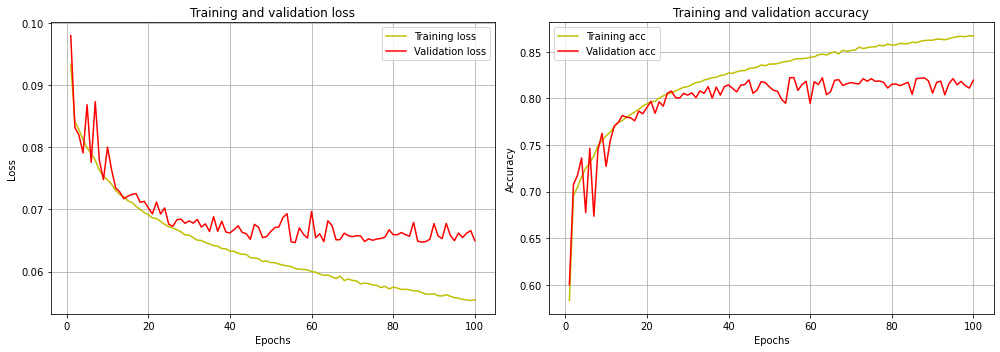

kk= 0
pw_mod_sw= 0


In [46]:
# for pw_mod_sw in [0,1,2,3,4,5,6,7,8]:
# for pw_mod_sw in [2,3,4]:
for pw_mod_sw in [0]:

    import tensorflow as tf
    tf.random.set_seed(0)
    from numpy.random import seed
    seed(10)
    
    if (lyr_no>10) | (neo>100):
        import tensorflow as tf
        tf.random.set_seed(0)
        from numpy.random import seed
        seed(5)

    if pw_mod_sw==3:
        import tensorflow as tf
        tf.random.set_seed(0)
        from numpy.random import seed
        seed(10)
        
    # if windais_fg==0:
    #     df['heading_wind']=(df.windDirection-df.headingMagnetic)*np.pi/180
    # if windais_fg==1:
    #     df['heading_wind']=(df.directionTrue-df.headingMagnetic)*np.pi/180

    # df['Cos_HWaveP']=np.cos(df['heading_wave'])+np.pi/df.meanwaveperiod
    # df['Cos_HWindP']=np.cos(2*df['heading_wind'])+np.pi/(2*df.meanwaveperiod)


    # In[ ]:


    if pw_mod_sw==0: 
#         df['PwMod']=df.speedOverGround_poly3_2+(12.5*df.waveheight_poly3*df.Cos_HWaveP)+(0.5*df.windspeed_poly1_5*df.Cos_HWindP)
#         inputs=['PwMod']
#         df = df.dropna(subset=['PwMod']

        df=df
        inputs=list(df.columns[1:])
        
        weath_ex=['currentSpeed_Stormglass','currentDirection_Stormglass', 'windSpeed_Stormglass','windDirection_Stormglass', 
                  'windSpeed_Copernicus','windDirection_Copernicus', 'waveHeight_Copernicus','waveDirection_Copernicus']                
        
        if weath_fg==1:
            df[weath_ex]=df[weath_ex]
        if weath_fg==2:
            df[weath_ex]=df[weath_ex]
            df=df.drop(weath_ex, axis=1)
            
            inputs=list(df.columns[1:])
                
        
#         if ann_sw==0:
#             lyr_no=3
#             neo=25
#             epcs=300 

    if pw_mod_sw==1: 
        df['PwMod_noCoeff']=df.speedOverGround_poly3_2+(df.waveheight_poly3*df.Cos_HWaveP)+(df.windspeed_poly1_5*df.Cos_HWindP)
        inputs=['PwMod_noCoeff']
        df = df.dropna(subset=['PwMod_noCoeff'])
        
#         if ann_sw==0:
#             lyr_no=3
#             neo=25
#             epcs=300 

    if pw_mod_sw==2: 
        inputs=['speedOverGround_poly3_2', 'waveheight_poly3' , 'Cos_HWaveP', 'windspeed_poly1_5', 'Cos_HWindP' ]    

        df = df.dropna(subset=['speedOverGround_poly3_2', 'waveheight_poly3' , 'Cos_HWaveP', 'windspeed_poly1_5', 'Cos_HWindP' ])

#         if ann_sw==0:
#             lyr_no=3
#             neo=25
#             epcs=300 



    ##############
    if pw_mod_sw==3: 
        inputs=['speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
                'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff']   

    if pw_mod_sw==4: 
        inputs=['speedOverGround_poly3_2', 'waveheight_poly3' , 'Cos_HWaveP', 'windspeed_poly1_5', 'Cos_HWindP',
               'speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
                'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff']   

        df = df.dropna(subset=['speedOverGround_poly3_2', 'waveheight_poly3' , 'Cos_HWaveP', 'windspeed_poly1_5', 'Cos_HWindP' ])

    if pw_mod_sw==5: 
        df['PwMod']=df.speedOverGround_poly3_2+(12.5*df.waveheight_poly3*df.Cos_HWaveP)+(0.5*df.windspeed_poly1_5*df.Cos_HWindP)

        inputs=['PwMod',
               'speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
                'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff'] 

        df = df.dropna(subset=['PwMod'])

    #########################
    if pw_mod_sw==6: 
        inputs=['speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','speedApparent']   
    
#         if ann_sw==0:
#             lyr_no=3
#             neo=25
#             epcs=300 


    ##############

    if pw_mod_sw==7: 
        inputs=['speedOverGround_poly3_2', 'waveheight_poly3' , 'Cos_HWaveP', 'windspeed_poly1_5', 'Cos_HWindP',
            'speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','speedApparent']   


    if pw_mod_sw==8: 
        df['PwMod']=df.speedOverGround_poly3_2+(12.5*df.waveheight_poly3*df.Cos_HWaveP)+(0.5*df.windspeed_poly1_5*df.Cos_HWindP)

        inputs=['PwMod',
            'speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue', 'speedApparent']   



    # In[ ]:

#     if pw_mod_sw==0: 
#         df.PwMod.shape
#         df.PwMod.describe()

#         df[['EngineFuelRate', 'PwMod']].corr(method='pearson')

        
    if pw_mod_sw==1: 
        df.PwMod_noCoeff.shape
        df.PwMod_noCoeff.describe()

        df[['EngineFuelRate', 'PwMod_noCoeff']].corr(method='pearson')



    # In[ ]:


#     if df['directionTrue'].max()<300:
#         df['directionTrue']= df['directionTrue']/np.pi*180


#     df['directionTrue'].max()
#     # df['headingMagnetic'].max()


#     # In[ ]:


#     df['wind_course_diff']=df['directionTrue']-df['courseOverGroundTrue']
#     df['wind_head_diff']=df['directionTrue']-df['headingMagnetic']
#     ###########


#     # In[ ]:


#     if latlon_prs_fg==0:print('lat and lon in past values')  ## Use the past values for location data (lat, Lon)

#     if latlon_prs_fg==1: ## Use the present values for location data (lat, Lon)

#         if 'latitude' in (inputs): df['latitude']=df_orig['latitude']

#         if 'longitude' in (inputs): df['longitude']=df_orig['longitude']


    # In[ ]:


    if Phi_course_fg==0:
        df['courseOverGroundTrue'] = df['courseOverGroundTrue'] 
    if Phi_course_fg==1:
        df['courseOverGroundTrue'] = df['courseOverGroundTrue'] - df['headingMagnetic']


    # In[ ]:


#     Phi_course_fg
#     df['headingMagnetic'].describe()
#     df['courseOverGroundTrue'].describe()


    # In[ ]:


    if diff_fg==0:
        df=df
    if diff_fg==1:
    #     df[inputs].diff(-1).describe()  #forward diff
        df[inputs]=df[inputs].diff(-1)
    if diff_fg==2:
    #     df[inputs].diff(1).describe()  #bacward diff
        df[inputs]=df[inputs].diff(1).shift(-1)

    df[inputs].iloc[-1]=df[inputs].iloc[-2]


    # In[ ]:


#     if add_diff_fg==0:
#         df=df
#     if add_diff_fg==1:
#         df[['diff_speedOverGround', 'diff_courseOverGroundTrue']]=df[['speedOverGround', 'courseOverGroundTrue']].diff(-1)
#         inputs.extend(('diff_speedOverGround', 'diff_courseOverGroundTrue'))

#     if add_diff_fg==2:
#         df[['diff_speedOverGround', 'diff_courseOverGroundTrue']]=df[['speedOverGround', 'courseOverGroundTrue']].diff(-1).shift(-1)
#         inputs.extend(('diff_speedOverGround', 'diff_courseOverGroundTrue'))

#     df.iloc[-1]=df.iloc[-2]
#     # df.tail()


    # In[ ]:


#     df[['EngineFuelRate', 'speedOverGround']].corr(method='pearson')


    # In[ ]:


#     if add_diff_fg!=0:
#         print(df[['EngineFuelRate', 'diff_speedOverGround']].corr(method='pearson'))


    # In[ ]:


    inputs


    # In[ ]:


    df_outs=df[outputs]

    df_ins=df[inputs]

    df_outs.shape
    df_ins.shape

    df_ins.isna().sum()
    df_outs.isna().sum()
    df_ins.head()
    df_outs.head()


    # In[ ]:


    if diff_fg!=0:
        df_ins.iloc[-1]=df_ins.iloc[-2]

    df_ins.head()
    # df_ins.tail()


    # In[ ]:


    df_outs.iloc[1500:1515]


    # In[ ]:


    df_ins.iloc[1500:1515]


    # In[ ]:


    # if diff_drop==1:
    #     df_ins=df_ins.drop(['wind_course_diff'], axis=1)
    # if diff_drop!=1:
    #     df_ins=df_ins


    # In[ ]:


    outs_id = " ".join(outputs)
    outs_id = outs_id.replace(" ", "_")

    ins_id = " ".join(inputs)
    ins_id = ins_id.replace(" ", "_")

    outs_id
    ins_id


    # In[ ]:


    if max_norm==1:
        df_ins_norm= df_ins/ df_ins.max(axis=0)
        # df_ins_norm = (df_ins - df_ins.min()) / (df_ins.max() - df_ins.min())

        df_outs_norm= df_outs/ df_outs.max(axis=0)
        # df_outs_norm = (df_outs - df_outs.min()) / (df_outs.max() - df_outs.min())

        df_ins=df_ins_norm
        df_outs=df_outs_norm

        # df_ins.describe()
        # df_outs.describe()

    if max_norm==2:
        df_ins_norm= (df_ins-df_ins.mean(axis=0))/ df_ins.std(axis=0)

        df_outs_norm= (df_outs-df_outs.mean(axis=0))/ df_outs.std(axis=0)

        df_ins=df_ins_norm
        df_outs=df_outs_norm

        # df_ins.describe()

    # In[ ]:


    import numpy as np
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    from scipy.stats import linregress
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_absolute_error

    ##########################
    if sz_fg==0: size=1800
    if sz_fg==1: size=10000
    if sz_fg==2: size=100000
    if sz_fg==3: size=len(df)
    ############################

    if tempo_res=='1min': size=len(df)

    ##########################

    X = df_ins.iloc[:size]
    y = df_outs.iloc[:size]


    # In[ ]:


    X.isna().sum()
    if 'distanceToNextDock' in (inputs): 
        X_filled=X.distanceToNextDock.interpolate(method='linear', limit_direction='forward', axis=0)
        X_filled2=X_filled.interpolate(method='linear', limit_direction='backward', axis=0)
        X.distanceToNextDock=X_filled2 
        X.isna().sum()
    
###################################################################
###################################################################

# ### ANN modeling

    from sklearn.model_selection import train_test_split

    if shff_fg ==1:  ### with shuffling the data
        X_train, X_vlid, Y_train, Y_vlid = train_test_split(X, y, test_size=0.2,train_size=0.8)
        X_valid, X_test, Y_valid, Y_test = train_test_split(X_vlid,Y_vlid, test_size = 0.25,train_size =0.75)
        X_valid_nshf, X_test_nshf, Y_valid_nshf, Y_test_nshf = train_test_split(X_vlid,Y_vlid, test_size = 0.25,train_size =0.75, shuffle = False)

    if shff_fg==0: ### without shuffling the data
        X_train, X_vlid, Y_train, Y_valid = train_test_split(X, y, test_size=0.2,train_size=0.8, shuffle = False)
        X_valid, X_test, Y_valid, Y_test = train_test_split(X_vlid,Y_valid, test_size = 0.25,train_size =0.75, shuffle = False)

    ######################################################
    # from sklearn.preprocessing import MinMaxScaler
    # scaler = MinMaxScaler()
    # scaler.fit(X)
    # X = scaler.transform(X)

    # #Split data into train and test to verify accuracy after fitting the model. 
    # from sklearn.model_selection import train_test_split
    # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

    #################### Inputs ########################
    input_sig = X.columns
    outcome_variable =y.columns


    # check_path = 'C:/Users/'+user_name+'/iHelm/ECO KIT/Data_analysi_final/'
    # model_path = 'C:/Users/'+user_name+'/iHelm/ECO KIT/Data_analysi_final/'

    check_path = 'C:/Users/'+user_name+'/iHelm/ECO KIT/Data_analysi_final/'
    model_path = 'C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/iHelm/ECO KIT/Data_analysi_final/'


    model_name = 'MHD_fl_ANN_outs_'+outs_id+'_AllVars'+'_wth_'+str(weath_fg)+'_phi_'+str(Phi_course_fg)+'_diff_'+str(add_diff_fg)+'_norm_'+str(max_norm)+'_tpfl_smps_'+str(top_fl_smps)+'_'+tempo_res+'_outs_'+str(outs_no)+'_lyrs_'+str(lyr_no)+'_epc_'+str(epcs)+'_Neo_'+str(neo)
    scale_name = 'MHD_fl_ANN_sc20_outs_'+outs_id+'_AllVars'+'_wth_'+str(weath_fg)+'+_phi_'+str(Phi_course_fg)+'_diff_'+str(add_diff_fg)+'_norm_'+str(max_norm)+'_tpfl_smps_'+str(top_fl_smps)+'_'+tempo_res+'_outs_'+str(outs_no)+'_lyrs_'+str(lyr_no)+'_epc_'+str(epcs)+'_Neo_'+str(neo)


    # Define r2_keras as an accuracy metrics
    def r2_keras(y_true, y_pred):

        ss_res = k.sum(k.square(y_true - y_pred))
        ss_tot = k.sum(k.square(y_true - k.mean(y_true)))
        return 1-ss_res/(ss_tot + k.epsilon())

    # Define rmse as a loss function
    def rmse(y_true, y_pred):

        return k.sqrt(k.mean(k.square(y_true - y_pred)))
    ###########################################################################################################
    if cross_valid==0:

        # Training function:
        #     def training(x_train, y_train, x_valid, y_valid, path, outs_no, lyr_no, neo,  epcs, shff_fg):
            # creating a model

        model = Sequential()

        if lyr_no==1:
            model.add(Dense(neo, activation='elu'))
        if lyr_no==2:
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
        if lyr_no==3:
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
        if lyr_no==4:
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
        if lyr_no==5:
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
        if lyr_no==10:
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
        if lyr_no==20:
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))
            model.add(Dense(neo, activation='elu'))


        model.add(Dense(outs_no, activation='relu'))

        #         Configure the model for training
        model.compile(loss=[rmse], optimizer='adam', metrics=[r2_keras])

        # print(model.summary())

        ##########################################

        # Fit with early stopping and model checkpoint to save the best models. 
        # from keras.callbacks import EarlyStopping, ModelCheckpoint
        # # patient early stopping
        # es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
        # mc = ModelCheckpoint('models/model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
        # # evaluate the model
        # history = model.fit(X_train, y_train ,verbose=1, epochs=500, batch_size=64,
        #                     validation_data=(X_test, y_test), callbacks=[es, mc])
        
        print('X_train.shape', X_train.shape)
        display(X_train.columns)
        X_train.head()
#         st=stop
    
        #Fit with no early stopping or other callbacks

#         history = model.fit(X_train, Y_train ,verbose=1, epochs=epcs, batch_size=64, validation_data=(X_test, Y_test))
        history = model.fit(X_train, Y_train ,verbose=1, epochs=epcs, batch_size=64, validation_data=(X_valid, Y_valid))

#########################################
#     def baseline_model():
#         # create model
#         model = Sequential()
#         model.add(Dense(neo, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
#         model.add(Dense(1, kernel_initializer='normal'))
#         # Compile model
# #         model.compile(loss=rmse, optimizer='adam')
#         model.compile(loss=mean_squared_error, optimizer='adam')
# #         model.compile(loss=mean_absolute_error, optimizer='adam')
# #         model.compile(loss=r2_score, optimizer='adam')
#         return model

#     from keras.wrappers.scikit_learn import KerasRegressor
#     from sklearn.model_selection import cross_val_score
#     estimator=KerasRegressor(build_fn=baseline_model, batch_size=round(0.05*X_train.shape[0]), epochs=epcs)

#     scores=cross_val_score(estimator=estimator, X=X_train.values, y=Y_train.values, cv=5, n_jobs=-1)
#     print('#########')
#     print('cross_validation_score=', scores.mean())

    ##########################################################################################################
#     X_train_nshf, X_vlid_nshf, Y_train_nshf, Y_valid_nshf = train_test_split(X, y, test_size=0.2,train_size=0.8, shuffle = False)
#     X_valid_nshf, X_test_nshf, Y_valid_nshf, Y_test_nshf = train_test_split(X_vlid_nshf,Y_valid_nshf, test_size = 0.25,train_size =0.75, shuffle = False)

#     X_train_shf, X_vlid_shf, Y_train_shf, Y_valid_shf = train_test_split(X, y, test_size=0.2,train_size=0.8, shuffle = True)
#     X_valid_shf, X_test_shf, Y_valid_shf, Y_test_shf = train_test_split(X_vlid_shf,Y_valid_shf, test_size = 0.25,train_size =0.75, shuffle = True)
    
    
    X_test_nshf=X_test_nshf; Y_test_nshf = Y_test_nshf;
    
    X_test_shf=X_test;  Y_test_shf=Y_test
    
    y_pred_ANN_nshf = model.predict(x=X_test_nshf, batch_size=None, verbose=0, steps=None)
    y_pred_ANN_shf = model.predict(x=X_test_shf, batch_size=None, verbose=0, steps=None)
    
#     y_pred_ANN_nshf = best_model.predict(x=X_test_nshf, batch_size=None, verbose=0, steps=None)
#     y_pred_ANN_shf = best_model.predict(x=X_test_shf, batch_size=None, verbose=0, steps=None)
    ############
###################################################
    model_path_id=model_path+model_name+'.hdf5'
    best_model = model
    ### Predicting BM (best-model)
    y_pred_BM = best_model.predict(x=X_test_shf, batch_size=None, verbose=0, steps=None)
    ### Save the BM with its outputs & inputs and score on OneDrive ####
    score=r2_score(Y_test_shf.iloc[:,0].values, y_pred_BM[:,0])
    model_id=model_name+'_score_'+str(round(abs(score),4))

    model_path_id=model_path+model_id+'.hdf5'
    best_model.save(model_path_id)
#####################################################

    mse_1_nshf = mean_squared_error(y_true=Y_test_nshf.iloc[:,0], y_pred=y_pred_ANN_nshf[:,0], squared=True)
    rmse_1_nshf = mean_squared_error(y_true=Y_test_nshf.iloc[:,0], y_pred=y_pred_ANN_nshf[:,0], squared=False)
    R2_1_nshf=r2_score(y_true=Y_test_nshf.iloc[:,0], y_pred=y_pred_ANN_nshf[:,0])
    mae_nshf=mean_absolute_error(y_true=Y_test_nshf.iloc[:,0], y_pred=y_pred_ANN_nshf[:,0])
    rmse_n1_nshf=rmse_1_nshf/Y_test_nshf.iloc[:,0].max()
    rmse_n1_nshf

    mse_1_shf = mean_squared_error(y_true=Y_test_shf.iloc[:,0], y_pred=y_pred_ANN_shf[:,0], squared=True)
    rmse_1_shf = mean_squared_error(y_true=Y_test_shf.iloc[:,0], y_pred=y_pred_ANN_shf[:,0], squared=False)
    R2_1_shf=r2_score(y_true=Y_test_shf.iloc[:,0], y_pred=y_pred_ANN_shf[:,0])
    mae_shf=mean_absolute_error(y_true=Y_test_shf.iloc[:,0], y_pred=y_pred_ANN_shf[:,0])
    rmse_n1_shf=rmse_1_shf/Y_test_shf.iloc[:,0].max()
    rmse_n1_shf

    ################################################
    print('epochs=', epcs)
    print('shff_fg=', shff_fg)
    print('Norm_fg=', max_norm)
    print('lyr_no=', lyr_no)
    print('neo=', neo)

    print(' MSE_ANN_nshf: {:.6f}'.format(mse_1_nshf))
    print(' RMSE_ANN_nshf: {:.6f}'.format(rmse_1_nshf))
    print('Normalized RMSE_ANN_nshf: {:.6f}'.format(rmse_n1_nshf))
    print('R2_ANN_nshf: {:.6f}'.format(R2_1_nshf))
    print('MAE_nshf: {:.6f}'.format(mae_nshf))

    print(' MSE_ANN_shf: {:.6f}'.format(mse_1_shf))
    print(' RMSE_ANN_shf: {:.6f}'.format(rmse_1_shf))
    print('Normalized RMSE_ANN_shf: {:.6f}'.format(rmse_n1_shf))
    print('R2_ANN_shf: {:.6f}'.format(R2_1_shf))
    print('MAE_shf: {:.6f}'.format(mae_shf))


    ##########################################################################################################

    # Predi
    # _, acc = model.evaluate(X_test, Y_test)
    # print("Accuracy = ", (acc * 100.0), "%")


    # prediction_test = model.predict(X_test)    
    # print(y_test, prediction_test)
    # print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)


    #plot the training and validation accuracy and loss at each epoc
    fig = plt.figure(figsize=(14,5))

    plt.subplot(1,2, 1)

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs[0:epcs], loss[0:epcs], 'y', label='Training loss')
    plt.plot(epochs[0:epcs], val_loss[0:epcs], 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1,2, 2)

    acc = history.history['r2_keras']
    val_acc = history.history['val_r2_keras']
    plt.plot(epochs[0:epcs], acc[0:epcs], 'y', label='Training acc')
    plt.plot(epochs[0:epcs], val_acc[0:epcs], 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.savefig('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/iHelm/ANN_iHelm/MHD_ANN_Fuel_Reg/MHD_All_Vars_ANNPlots_'+'_wth_'+str(weath_fg)+'_shff_'+str(shff_fg)+'_cruis_'+str(cruis_fg)+'_wn_sw_'+wn_sp_sw+'_inps'+str(X_train.shape[1])+'_outs_'+str(outs_no)+'_lyrs_'+str(lyr_no)+'_epc_'+str(epcs)+'_Neo_'+str(neo)+'_'+str(round(R2_1_shf,4))+'.png', dpi=300)

    plt.show()
    ##########################################################
    dfst_iter.append(kk)
    dfst_phy_mod_sw.append(pw_mod_sw)
    dfst_inps.append(X_train.shape[1])
    dfst_inps_list.append(inputs)
    dfst_outs_list.append(outputs)
    # dfst_DTsz.append(DTsz)
    dfst_Lyrs.append(lyr_no)
    dfst_Neo.append(neo)
    dfst_epcs.append(epcs)
    dfst_shff.append(shff_fg)
    dfst_norm.append(max_norm)

    dfst_MSE_nshf.append(mse_1_nshf)
    dfst_RMSE_nshf.append(rmse_1_nshf)
    dfst_R2_nshf.append(R2_1_nshf)
    dfst_MAE_nshf.append(mae_nshf)

    dfst_MSE_shf.append(mse_1_shf)
    dfst_RMSE_shf.append(rmse_1_shf)
    dfst_R2_shf.append(R2_1_shf)
    dfst_MAE_shf.append(mae_shf)

    df_stats=pd.DataFrame({'Index':dfst_iter, 'Phy_mod': dfst_phy_mod_sw, 'No_inputs':dfst_inps,'inputs':dfst_inps_list, 'outputs':dfst_outs_list, 
                           'shuffle_fg':dfst_shff,'Norm_fg':dfst_norm,
                           'ANN_layers':dfst_Lyrs,'ANN Neurons':dfst_Neo, 'epochs':dfst_epcs,
                            'MSE_nshf':dfst_MSE_nshf,'RMSE_nshf':dfst_RMSE_nshf,'R2_nshf':dfst_R2_nshf,'MAE_nshf':dfst_MAE_nshf,
                            'MSE_shf':dfst_MSE_shf,'RMSE_shf':dfst_RMSE_shf,'R2_shf':dfst_R2_shf,'MAE_shf':dfst_MAE_shf})

    kk_id=kk_id+1
    if kk_id==1:
        import random
        sym=round(random.uniform(0, 1),4)

    
    df_stats.to_excel('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/iHelm/ANN_iHelm/MHD_ANN_Fuel_Reg/MHD_AllVars_Fuel_Reg_ANN_'+'_wth_'+str(weath_fg)+'PwMod_sw_'+str(pw_mod_sw)+'_wn_sw_'+wn_sp_sw+'_shff_'+str(shff_fg)+'_inps_'+str(X_train.shape[1])+'_cruis_'+str(cruis_fg)+'_'+tempo_res+'_'+str(sym)+'.xlsx')
    
    print('kk=', kk)
    print('pw_mod_sw=', pw_mod_sw)
    
    if kk==0:
        df_fuel_stats=pd.DataFrame(index=Y_test.index)
        df_fuel_result=Y_test
    
    df_fuel_stats['inputs_pw_mod_sw'+str(pw_mod_sw)]=str(df_stats.inputs[kk])
    df_fuel_stats['R2_nshf_pw_mod_sw'+str(pw_mod_sw)]=dfst_R2_nshf[kk]
    df_fuel_stats['MAE_nshf_pw_mod_sw'+str(pw_mod_sw)]=dfst_MAE_nshf[kk]
    df_fuel_stats['R2_shf_pw_mod_sw'+str(pw_mod_sw)]=dfst_R2_shf[kk]
    df_fuel_stats['MAE_shf_pw_mod_sw'+str(pw_mod_sw)]=dfst_MAE_shf[kk]
    
    df_fuel_result['Outs_pw_mod_sw'+str(pw_mod_sw)]=pd.DataFrame(y_pred_ANN_shf[:, 0]).values 

        
    if pw_mod_sw==5:
        All_inputs=X_test

        
    if pw_mod_sw==8:
        df_fuel_descb_outs=df_fuel_result[['EngineFuelRate', 'Outs_pw_mod_sw'+outs1,'Outs_pw_mod_sw'+outs2]].T.describe()
        descb_cols=df_fuel_descb_outs.index.tolist()
        descb_cols12=['outs_'+outs1+'_'+outs2+'_'+ descb_cols for descb_cols in descb_cols]
        df_fuel_result[descb_cols12]=df_fuel_descb_outs.T

        df_fuel_result[df_fuel_stats.columns]=df_fuel_stats
        df_fuel_result[All_inputs.columns]=All_inputs
        

    df_fuel_result.to_excel('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/iHelm/ANN_iHelm/MHD_ANN_Fuel_Reg/MHD_AllVars_Fuel_Reg_ANN_'+'_wth_'+str(weath_fg)+'compar_sw_'+str(compar_sw)+'_cruis_'+str(cruis_fg)+'_wn_sw_'+wn_sp_sw+'_shff_'+str(shff_fg)+'_inps_'+str(X_train.shape[1])+'_'+tempo_res+'_'+str(sym)+'.xlsx')

    kk=kk+1
    

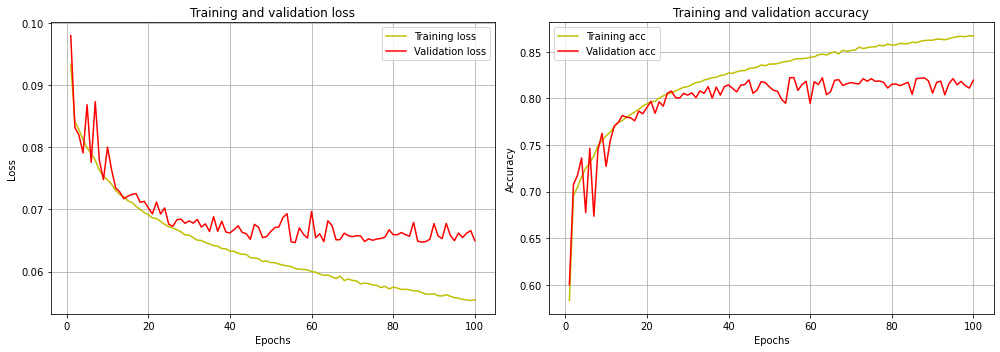

In [47]:
# model_path = 'C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/iHelm/ECO KIT/Data_analysi_final/'
# model_name = 'MHD_fl_ANN_outs_'+outs_id+'_AllVars'+'_phi_'+str(Phi_course_fg)+'_diff_'+str(add_diff_fg)+'_norm_'+str(max_norm)+'_tpfl_smps_'+str(top_fl_smps)+'_'+tempo_res+'_outs_'+str(outs_no)+'_lyrs_'+str(lyr_no)+'_epc_'+str(epcs)+'_Neo_'+str(neo)
# model_path_id=model_path+model_name+'.hdf5'
# best_model = model
# ### Predicting BM (best-model)
# y_pred_BM = best_model.predict(x=X_test_shf, batch_size=None, verbose=0, steps=None)
# ### Save the BM with its outputs & inputs and score on OneDrive ####
# score=r2_score(Y_test_shf.iloc[:,0].values, y_pred_BM[:,0])
# model_id=model_name+'_score_'+str(round(abs(score),4))

# model_path_id=model_path+model_id+'.hdf5'
# best_model.save(model_path_id)
# ####################################

#plot the training and validation accuracy and loss at each epoc
fig = plt.figure(figsize=(14,5))

plt.subplot(1,2, 1)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs[0:epcs], loss[0:epcs], 'y', label='Training loss')
plt.plot(epochs[0:epcs], val_loss[0:epcs], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1,2, 2)

acc = history.history['r2_keras']
val_acc = history.history['val_r2_keras']
plt.plot(epochs[0:epcs], acc[0:epcs], 'y', label='Training acc')
plt.plot(epochs[0:epcs], val_acc[0:epcs], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/iHelm/ANN_iHelm/MHD_ANN_Fuel_Reg/MHD_All_Vars_ANNPlots_'+'_wth_'+str(weath_fg)+'_shff_'+str(shff_fg)+'_cruis_'+str(cruis_fg)+'_wn_sw_'+wn_sp_sw+'_inps'+str(X_train.shape[1])+'_outs_'+str(outs_no)+'_lyrs_'+str(lyr_no)+'_epc_'+str(epcs)+'_Neo_'+str(neo)+'_'+str(round(R2_1_shf,4))+'.png', dpi=300)

plt.show()


In [48]:
# %%shell
# jupyter nbconvert --to html '/content/gdrive/MyDrive/Colab Notebooks/GColab_1Min_Pred_ANN_2020_Speed_SOG_Direction'

# os.chdir(cwd) 


from IPython.display import Javascript
from nbconvert import HTMLExporter

def save_notebook():
    display(
        Javascript("IPython.notebook.save_notebook()"),
        include=['application/javascript']
    )

def output_HTML(read_file, output_file):
    import codecs
    import nbformat
    exporter = HTMLExporter()
    # read_file is '.ipynb', output_file is '.html'
    output_notebook = nbformat.read(read_file, as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)


# In[ ]:


cwd = os.getcwd() 
directory = os.path.join('C:/Users/'+user_name+'/iHelm/ANN_iHelm')

os.chdir(directory) 
####################

R2id=round(score, 4)

import time

save_notebook()
time.sleep(3)
current_file = 'MHD_ANN_Fuel_Reg_Model.ipynb'
output_file = 'C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/Pred_DT_Results/MHD_ANN_Fuel_Reg'+str(R2id)+'_shff_'+'_wth_'+str(weath_fg)+str(shff_fg)+'_cruis_'+str(cruis_fg)+'_wn_sw_'+wn_sp_sw+'_inps'+str(X_train.shape[1])+'_outs_'+str(outs_no)+'_lyrs_'+str(lyr_no)+'_epc_'+str(epcs)+'_Neo_'+str(neo)+'_Model.html'

# os.chdir('C:/Users/mohabu/OneDrive - Högskolan i Halmstad/Pred_DT_Results')
output_HTML(current_file, output_file)


In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1500      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               1

In [50]:
inputs

['speedOverGround',
 'courseOverGroundTrue',
 'distanceFromDock',
 'accumDistLeg',
 'accumTimeLeg',
 'distanceToNextDock',
 'speedApparent',
 'pitch',
 'wind_course_diff',
 'roll',
 'latitude',
 'longitude',
 'windSpeed_onboard',
 'windDirection_onboard']

In [51]:
outputs

['EngineFuelRate']

In [52]:
X_train.shape

(102112, 14)

In [53]:
df_stats

,Index,Phy_mod,No_inputs,inputs,outputs,shuffle_fg,Norm_fg,ANN_layers,ANN Neurons,epochs,MSE_nshf,RMSE_nshf,R2_nshf,MAE_nshf,MSE_shf,RMSE_shf,R2_shf,MAE_shf
0,0,0,14,"[speedOverGround, courseOverGroundTrue, distan...",[EngineFuelRate],1,1,10,100,100,0.004484,0.066962,0.82126,0.049201,0.004051,0.063645,0.833289,0.047517


In [54]:
df_fuel_result

,EngineFuelRate,Outs_pw_mod_sw0
time,,
2020-03-29 20:34:00,0.158717,0.193547
2020-04-16 19:06:00,0.168523,0.137473
2021-02-12 06:42:00,0.187992,0.176221
2020-05-29 13:15:00,0.316477,0.356815
2020-09-18 21:25:00,0.314108,0.271857
...,...,...
2021-01-13 10:10:00,0.256007,0.239616
2020-10-10 22:10:00,0.240353,0.238224
2020-04-10 06:53:00,0.152913,0.152952


In [55]:
kk

1

In [56]:
df_fuel_result.shape

(6383, 2)

In [57]:
df_fuel_result

,EngineFuelRate,Outs_pw_mod_sw0
time,,
2020-03-29 20:34:00,0.158717,0.193547
2020-04-16 19:06:00,0.168523,0.137473
2021-02-12 06:42:00,0.187992,0.176221
2020-05-29 13:15:00,0.316477,0.356815
2020-09-18 21:25:00,0.314108,0.271857
...,...,...
2021-01-13 10:10:00,0.256007,0.239616
2020-10-10 22:10:00,0.240353,0.238224
2020-04-10 06:53:00,0.152913,0.152952


In [58]:
df_fuel_stats.shape

(6383, 5)

In [59]:
df_fuel_stats

,inputs_pw_mod_sw0,R2_nshf_pw_mod_sw0,MAE_nshf_pw_mod_sw0,R2_shf_pw_mod_sw0,MAE_shf_pw_mod_sw0
time,,,,,
2020-03-29 20:34:00,"['speedOverGround', 'courseOverGroundTrue', 'd...",0.82126,0.049201,0.833289,0.047517
2020-04-16 19:06:00,"['speedOverGround', 'courseOverGroundTrue', 'd...",0.82126,0.049201,0.833289,0.047517
2021-02-12 06:42:00,"['speedOverGround', 'courseOverGroundTrue', 'd...",0.82126,0.049201,0.833289,0.047517
2020-05-29 13:15:00,"['speedOverGround', 'courseOverGroundTrue', 'd...",0.82126,0.049201,0.833289,0.047517
2020-09-18 21:25:00,"['speedOverGround', 'courseOverGroundTrue', 'd...",0.82126,0.049201,0.833289,0.047517
...,...,...,...,...,...
2021-01-13 10:10:00,"['speedOverGround', 'courseOverGroundTrue', 'd...",0.82126,0.049201,0.833289,0.047517
2020-10-10 22:10:00,"['speedOverGround', 'courseOverGroundTrue', 'd...",0.82126,0.049201,0.833289,0.047517
2020-04-10 06:53:00,"['speedOverGround', 'courseOverGroundTrue', 'd...",0.82126,0.049201,0.833289,0.047517


In [60]:
df_stats

,Index,Phy_mod,No_inputs,inputs,outputs,shuffle_fg,Norm_fg,ANN_layers,ANN Neurons,epochs,MSE_nshf,RMSE_nshf,R2_nshf,MAE_nshf,MSE_shf,RMSE_shf,R2_shf,MAE_shf
0,0,0,14,"[speedOverGround, courseOverGroundTrue, distan...",[EngineFuelRate],1,1,10,100,100,0.004484,0.066962,0.82126,0.049201,0.004051,0.063645,0.833289,0.047517


In [61]:
tempo_res

'1min'

In [62]:
dforig.shape

(735619, 35)

In [63]:
dforig.columns

Index(['engineActualPercentTorque', 'engineSpeed', 'engineFuelRate',
       'accelPedalPos', 'engineTripFuel', 'engineTotalFuelUsed', 'latitude',
       'longitude', 'satellites', 'rateOfTurn', 'headingMagnetic',
       'courseOverGroundTrue', 'speedOverGround', 'magneticVariation', 'pitch',
       'roll', 'temperature', 'pressure', 'windSpeedOverGround',
       'windDirectionTrue', 'deltaTimestamp', 'fuelPerStep',
       'fuelPerStepEngineTotal', 'deltaDistance', 'acceleration',
       'courseHeadingDiff', 'engineOn', 'distanceFromDock', 'legId',
       'distanceToNextDock', 'distanceToPreviousDock', 'segmentId',
       'accumDistLeg', 'accumFuelLeg', 'accumTimeLeg'],
      dtype='object')

In [64]:
df_dt_fg

1

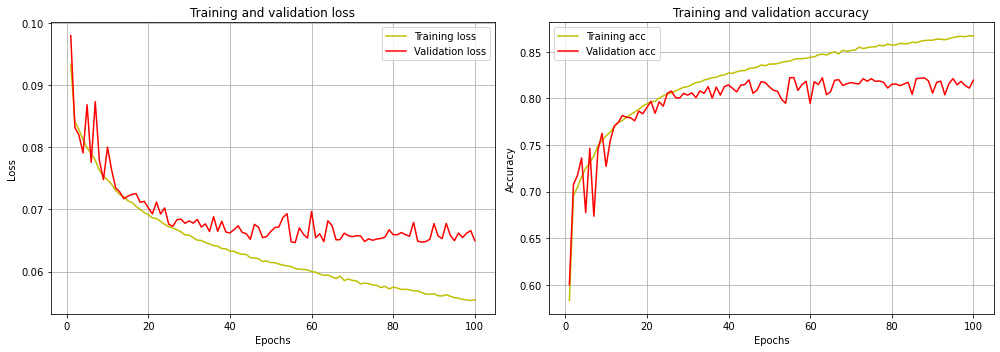

In [65]:
fig = plt.figure(figsize=(14,5))

plt.subplot(1,2, 1)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs[0:epcs], loss[0:epcs], 'y', label='Training loss')
plt.plot(epochs[0:epcs], val_loss[0:epcs], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1,2, 2)

acc = history.history['r2_keras']
val_acc = history.history['val_r2_keras']
plt.plot(epochs[0:epcs], acc[0:epcs], 'y', label='Training acc')
plt.plot(epochs[0:epcs], val_acc[0:epcs], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()

plt.savefig('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/iHelm/ANN_iHelm/MHD_ANN_Fuel_Reg/MHD_All_Vars_ANNPlots_'+'_wth_'+str(weath_fg)+'_shff_'+str(shff_fg)+'_cruis_'+str(cruis_fg)+'_wn_sw_'+wn_sp_sw+'_inps'+str(X_train.shape[1])+'_outs_'+str(outs_no)+'_lyrs_'+str(lyr_no)+'_epc_'+str(epcs)+'_Neo_'+str(neo)+'_'+str(round(R2_1_shf,4))+'.png', dpi=300)

plt.show()

In [66]:
weath_fg

2

In [67]:
X_train.shape

(102112, 14)

In [68]:
tempo_res

'1min'

In [69]:
score

0.833288916180237